<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [1]:
data <- read.csv("energy_efficiency_data.csv", sep = ",")
#data <- na.omit(data)
head(data)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [2]:
summary(data)

 Relative_Compactness  Surface_Area     Wall_Area       Roof_Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall_Height  Orientation    Glazing_Area    Glazing_Area_Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

In [3]:
#data_111 <- read.csv(file = file.choose(), header = TRUE, sep = ",")

#2

In [3]:
#деление на тестовую и обучающую выборку
index <- sample(1:nrow(data), nrow(data) * 0.8) 
test <- data[-c(index), ]
train <- data[index, ]

#3

In [4]:
#где выходом является у1 = sum(по всем столбцам, кроме Cooling_Load)
#lm_y1 <- lm(formula = Heating_Load ~ Relative_Compactness + Surface_Area 
            #+ Wall_Area + Roof_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train)
lm_y1 <- lm(formula = Heating_Load ~.-Cooling_Load, data = train)
summary(lm_y1)


Call:
lm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9647 -1.3075 -0.0876  1.3562  7.8221 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                78.132715  21.330542   3.663 0.000271 ***
Relative_Compactness      -61.823740  11.533510  -5.360 1.18e-07 ***
Surface_Area               -0.081968   0.019179  -4.274 2.23e-05 ***
Wall_Area                   0.058010   0.007549   7.684 6.24e-14 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.269122   0.381126  11.201  < 2e-16 ***
Orientation                 0.070584   0.105436   0.669 0.503463    
Glazing_Area               19.923371   0.914454  21.787  < 2e-16 ***
Glazing_Area_Distribution   0.234373   0.078143   2.999 0.002817 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [54]:
glm_y1 <- glm(Heating_Load ~.-Cooling_Load, data = train)
summary(glm_y1)


Call:
glm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.9647  -1.3075  -0.0876   1.3562   7.8221  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                78.132715  21.330542   3.663 0.000271 ***
Relative_Compactness      -61.823740  11.533510  -5.360 1.18e-07 ***
Surface_Area               -0.081968   0.019179  -4.274 2.23e-05 ***
Wall_Area                   0.058010   0.007549   7.684 6.24e-14 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.269122   0.381126  11.201  < 2e-16 ***
Orientation                 0.070584   0.105436   0.669 0.503463    
Glazing_Area               19.923371   0.914454  21.787  < 2e-16 ***
Glazing_Area_Distribution   0.234373   0.078143   2.999 0.002817 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [7]:
nlm_y1 <- nlm(f = Heating_Load ~ Relative_Compactness + Surface_Area 
            + Wall_Area + Roof_Area + Overall_Height + Orientation 
            + Glazing_Area + Glazing_Area_Distribution, data = train, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
summary(nlm_y1)

ERROR: ignored

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     45
	error: 164687.77083
	time: 0.02 secs



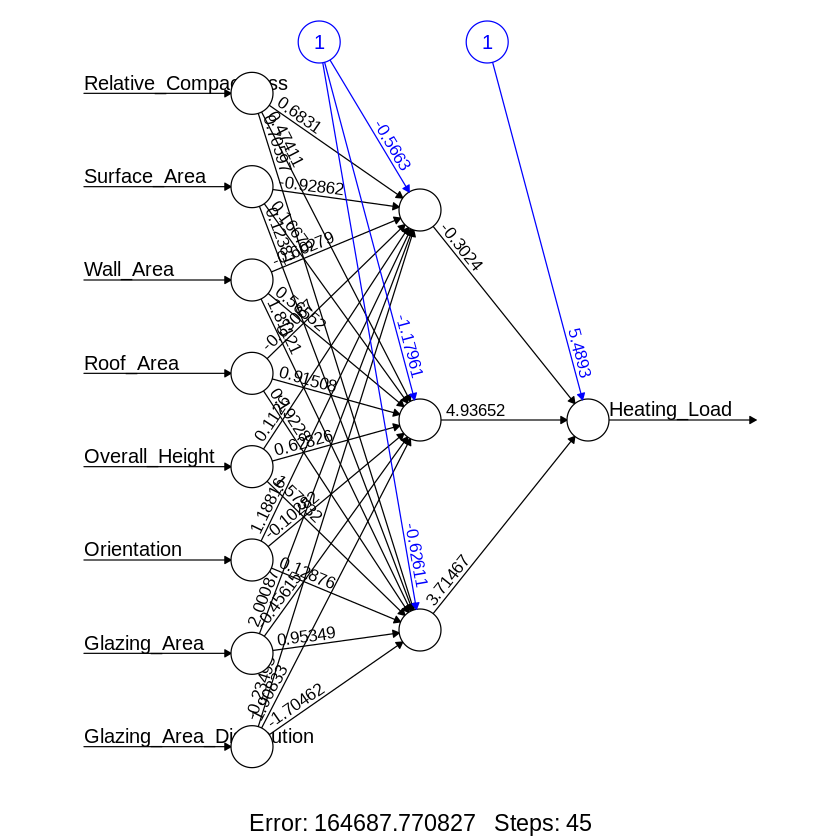

In [40]:
#install.packages("neuralnet")
library(neuralnet)

neuralnet_y1 <- neuralnet(Heating_Load ~.-Cooling_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y1, rep = 1)

#-------------------------------------------------------------------------------------------------------------------------

In [7]:
#где выходом является у2 = sum(по всем столбцам, кроме Heating_Load)
lm_y2 <- lm(formula = Cooling_Load ~.-Heating_Load, data = train)
summary(lm_y2)


Call:
lm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6152 -1.4489 -0.2435  1.3235 11.0730 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                90.455729  23.223594   3.895 0.000109 ***
Relative_Compactness      -67.723665  12.557090  -5.393 9.93e-08 ***
Surface_Area               -0.081968   0.020881  -3.926 9.65e-05 ***
Wall_Area                   0.041998   0.008219   5.110 4.33e-07 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.418071   0.414950  10.647  < 2e-16 ***
Orientation                 0.188871   0.114794   1.645 0.100425    
Glazing_Area               14.929675   0.995610  14.996  < 2e-16 ***
Glazing_Area_Distribution   0.074071   0.085078   0.871 0.384303    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [8]:
glm_y2 <- glm(Cooling_Load ~.-Heating_Load, data = train)
summary(glm_y2)


Call:
glm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.6152  -1.4489  -0.2435   1.3235  11.0730  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                90.455729  23.223594   3.895 0.000109 ***
Relative_Compactness      -67.723665  12.557090  -5.393 9.93e-08 ***
Surface_Area               -0.081968   0.020881  -3.926 9.65e-05 ***
Wall_Area                   0.041998   0.008219   5.110 4.33e-07 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.418071   0.414950  10.647  < 2e-16 ***
Orientation                 0.188871   0.114794   1.645 0.100425    
Glazing_Area               14.929675   0.995610  14.996  < 2e-16 ***
Glazing_Area_Distribution   0.074071   0.085078   0.871 0.384303    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [ ]:
nlm_y2 <- nlm(f = Cooling_Load ~ Relative_Compactness + Surface_Area 
            + Wall_Area + Roof_Area + Overall_Height + Orientation 
            + Glazing_Area + Glazing_Area_Distribution, data = train, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
summary(nlm_y2)

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     44
	error: 192798.22141
	time: 0.03 secs



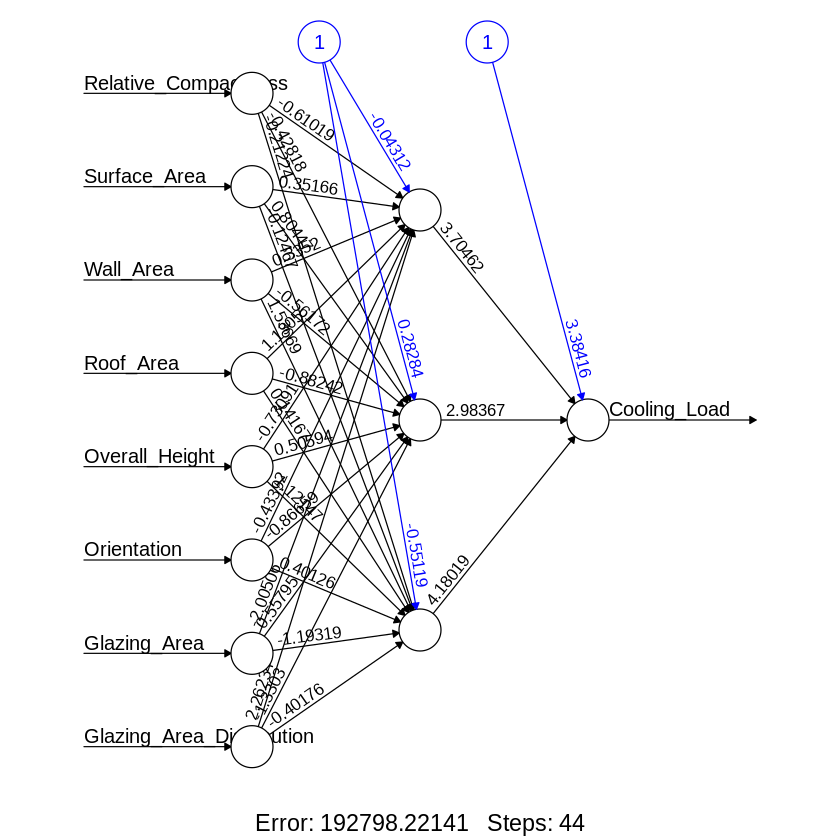

In [39]:
neuralnet_y2 <- neuralnet(Cooling_Load ~.-Heating_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y2, rep = 1)

#4

In [48]:
#прогноз пошёл

#comp_nn_y1$net.result

In [49]:

#comp_nn_y2$net.result

In [56]:
#линейная
pred_lm_y1 <- predict(lm_y1, test)
pred_lm_y2 <- predict(lm_y2, test)
#логистическая
pred_glm_y1 <- predict(glm_y1, test)
pred_glm_y2 <- predict(glm_y2, test)
#полиномиальная
pred_nlm_y1 <- predict(nlm_y1, test)
pred_nlm_y2 <- predict(nlm_y2, test)
#нейросеть
#comp_nn_y1 <- compute(neuralnet_y1, train[, 1:8])
#comp_nn_y2 <- compute(neuralnet_y2, train[, 1:8])
pred_nn_y1 <- predict(neuralnet_y1, test)
pred_nn_y2 <- predict(neuralnet_y2, test)

Warning message in predict.lm(lm_y1, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(lm_y2, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [70]:
accuracy <- function(pred, y){
  return (1 - norm(as.matrix(pred)-as.matrix(y)) / norm(as.matrix(y)))
}
acc_lm_y1 <- accuracy(pred_lm_y1, test$Heating_Load)
acc_glm_y1 <- accuracy(pred_glm_y1, test$Heating_Load)
acc_nn_y1 <- accuracy(pred_nn_y1, test$Heating_Load)
acc_nlm_y1 <- 0 #accuracy(pred_nlm_y1, test$Heating_Load)

acc_lm_y2 <- accuracy(pred_lm_y2, test$Cooling_Load)
acc_glm_y2 <- accuracy(pred_glm_y2, test$Cooling_Load)
acc_nn_y2 <- accuracy(pred_nn_y2, test$Cooling_Load)
acc_nlm_y2 <- 0 #accuracy(pred_nlm_y1, test$Cooling_Load)

In [72]:
r1 = c(acc_lm_y1, acc_glm_y1, acc_nlm_y1, acc_nn_y1)
r2 = c(acc_lm_y2, acc_glm_y2, acc_nlm_y2, acc_nn_y2)

table_0 <- matrix(c(r1,r2), ncol=4, byrow=TRUE)
colnames(table_0) <- c('lm', 'glm', 'nlm', 'nn')
rownames(table_0) <- c('y1', 'y2')
rezult <- as.table(table_0)
print(rezult)

           lm        glm        nlm         nn
y1 0.91123551 0.91123551 0.00000000 0.04186919
y2 0.91025662 0.91025662 0.00000000 0.03840205
